In [1]:
%matplotlib inline
import pandas
import keras
import numpy as np
import os

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

Using TensorFlow backend.


In [7]:
import json
classIndex = json.load(open("imagenet_class_index.json"))

In [8]:
classIndex

{u'344': [u'n02398521', u'hippopotamus'],
 u'0': [u'n01440764', u'tench'],
 u'346': [u'n02408429', u'water_buffalo'],
 u'347': [u'n02410509', u'bison'],
 u'340': [u'n02391049', u'zebra'],
 u'341': [u'n02395406', u'hog'],
 u'342': [u'n02396427', u'wild_boar'],
 u'343': [u'n02397096', u'warthog'],
 u'810': [u'n04264628', u'space_bar'],
 u'811': [u'n04265275', u'space_heater'],
 u'812': [u'n04266014', u'space_shuttle'],
 u'813': [u'n04270147', u'spatula'],
 u'348': [u'n02412080', u'ram'],
 u'349': [u'n02415577', u'bighorn'],
 u'816': [u'n04277352', u'spindle'],
 u'817': [u'n04285008', u'sports_car'],
 u'595': [u'n03496892', u'harvester'],
 u'719': [u'n03935335', u'piggy_bank'],
 u'718': [u'n03933933', u'pier'],
 u'717': [u'n03930630', u'pickup'],
 u'716': [u'n03930313', u'picket_fence'],
 u'715': [u'n03929855', u'pickelhaube'],
 u'714': [u'n03929660', u'pick'],
 u'713': [u'n03924679', u'photocopier'],
 u'712': [u'n03920288', u'Petri_dish'],
 u'711': [u'n03916031', u'perfume'],
 u'710': [u

In [2]:
DATA_FOLDER = "../data/dl/"

In [83]:
train_generator = train_datagen.flow_from_directory(
        DATA_FOLDER + 'train',
        target_size=(224, 224),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        DATA_FOLDER + 'val',
        target_size=(224, 224),
        batch_size=5,
        class_mode='binary')

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 1 classes.


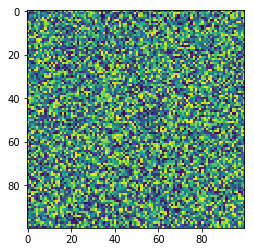

In [14]:
import matplotlib.pyplot as plt
import numpy as np
img = np.random.rand(100,100)
plt.imshow(img)
plt.show()

In [15]:
import numpy as np

# Transformation matrix for Deuteranope (a form of red/green color deficit)
lms2lmsd = np.array([[1,0,0],[0.494207,0,1.24827],[0,0,1]])
# Transformation matrix for Protanope (another form of red/green color deficit)
lms2lmsp = np.array([[0,2.02344,-2.52581],[0,1,0],[0,0,1]])
# Transformation matrix for Tritanope (a blue/yellow deficit - very rare)
lms2lmst = np.array([[1,0,0],[0,1,0],[-0.395913,0.801109,0]])
# Colorspace transformation matrices
rgb2lms = np.array([[17.8824,43.5161,4.11935],[3.45565,27.1554,3.86714],[0.0299566,0.184309,1.46709]])
lms2rgb = np.linalg.inv(rgb2lms)
# Daltonize image correction matrix
err2mod = np.array([[0,0,0],[0.7,1,0],[0.7,0,1]])

def _invoke(f, img):
    new = np.zeros_like(img)
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            new[i, j, :3] = np.dot(f, img[i, j, :3])
    return new

def daltonize(img, mode='protanope'):
    lms = _invoke(rgb2lms, img)
    if mode == 'protanope':
        error_function = lms2lmsd
    errored = _invoke(lms2lmsd, lms)
    return _invoke(lms2rgb, errored)

In [17]:
from vgg16 import VGG16

In [18]:
model = VGG16(include_top=True, weights='imagenet')

139.0
(224, 224, 3)
../data/dl/train/n01443537/images/n01443537_202.JPEG
('Predicted:', [[(u'n04443257', u'tobacco_shop', 0.22104795), (u'n03598930', u'jigsaw_puzzle', 0.16428815), (u'n03095699', u'container_ship', 0.06758792), (u'n04462240', u'toyshop', 0.06412144), (u'n03998194', u'prayer_rug', 0.051936809)]])
('Predicted:', [[(u'n03598930', u'jigsaw_puzzle', 0.20487298), (u'n04443257', u'tobacco_shop', 0.053779814), (u'n03095699', u'container_ship', 0.051088944), (u'n04200800', u'shoe_shop', 0.03292764), (u'n01698640', u'American_alligator', 0.030129962)]])


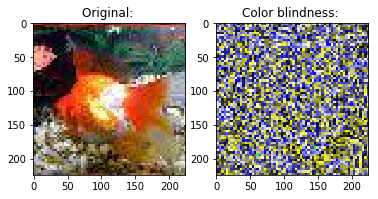

93.0
(224, 224, 3)
../data/dl/train/n01443537/images/n01443537_217.JPEG
('Predicted:', [[(u'n03344393', u'fireboat', 0.53128934), (u'n03388043', u'fountain', 0.21281153), (u'n09288635', u'geyser', 0.018128691), (u'n03933933', u'pier', 0.013694881), (u'n03874293', u'paddlewheel', 0.013107443)]])
('Predicted:', [[(u'n03160309', u'dam', 0.15437025), (u'n02859443', u'boathouse', 0.096346974), (u'n03388043', u'fountain', 0.055180769), (u'n02687172', u'aircraft_carrier', 0.054556854), (u'n03877845', u'palace', 0.048765194)]])


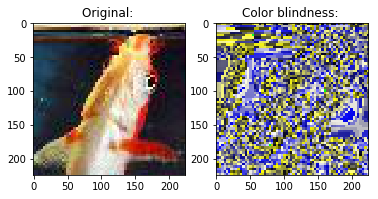

135.0
(224, 224, 3)
../data/dl/train/n01443537/images/n01443537_417.JPEG
('Predicted:', [[(u'n04589890', u'window_screen', 0.14880857), (u'n04443257', u'tobacco_shop', 0.10843433), (u'n03018349', u'china_cabinet', 0.05581937), (u'n01443537', u'goldfish', 0.052477412), (u'n04462240', u'toyshop', 0.04298275)]])
('Predicted:', [[(u'n02363005', u'beaver', 0.062504895), (u'n04589890', u'window_screen', 0.039528992), (u'n02859443', u'boathouse', 0.037838854), (u'n02009229', u'little_blue_heron', 0.03547598), (u'n02009912', u'American_egret', 0.03225581)]])


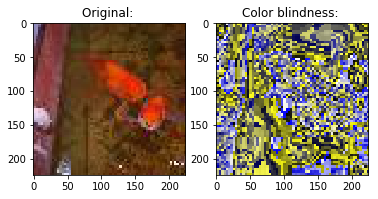

138.0
(224, 224, 3)
../data/dl/train/n01443537/images/n01443537_75.JPEG
('Predicted:', [[(u'n03344393', u'fireboat', 0.47169533), (u'n04209239', u'shower_curtain', 0.067811251), (u'n01443537', u'goldfish', 0.062588692), (u'n03388043', u'fountain', 0.025684766), (u'n03773504', u'missile', 0.022571824)]])
('Predicted:', [[(u'n02815834', u'beaker', 0.11197375), (u'n03733805', u'measuring_cup', 0.061592463), (u'n03344393', u'fireboat', 0.05623512), (u'n04209239', u'shower_curtain', 0.043870568), (u'n02948072', u'candle', 0.039019533)]])


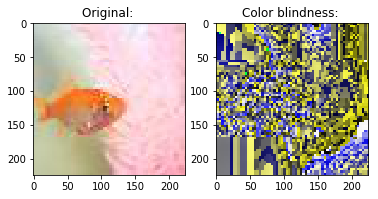

41.0
(224, 224, 3)
../data/dl/train/n01443537/images/n01443537_262.JPEG
('Predicted:', [[(u'n01910747', u'jellyfish', 0.49962875), (u'n04266014', u'space_shuttle', 0.14596459), (u'n03240683', u'drilling_platform', 0.078699499), (u'n04296562', u'stage', 0.074606404), (u'n03782006', u'monitor', 0.043379132)]])
('Predicted:', [[(u'n01910747', u'jellyfish', 0.74608231), (u'n04266014', u'space_shuttle', 0.039889172), (u'n03240683', u'drilling_platform', 0.035613149), (u'n03782006', u'monitor', 0.030682834), (u'n04296562', u'stage', 0.022017322)]])


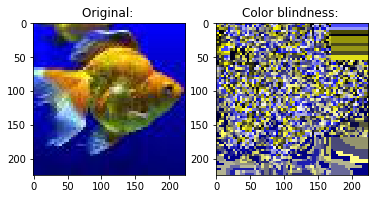

In [133]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

samples = train_generator.next()
for i, img in enumerate(samples[0]):
    findex = samples[1][i]
    print(findex)
    print(img.shape)
    fname = train_generator.filenames[int(findex)]
    fpath = os.path.join(DATA_FOLDER, 'train', fname)
    print(fpath)
    
    img = image.load_img(fpath, target_size=(224, 224))
    imgOrig = img
    img = img.copy()
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    

    #imgOrig = img
    #img = image.img_to_array(img)
    #img = img * 255.0
    #img = np.expand_dims(img, axis=0)
    #img = preprocess_input(img)
    
    preds = model.predict(img)
    print('Predicted:', decode_predictions(preds))

    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(imgOrig)
    a.set_title('Original: ')
    
    a = fig.add_subplot(1, 2, 2)
    daltonized = daltonize(image.img_to_array(imgOrig))
    plt.imshow(daltonized)
    
    daltonized = daltonized.copy()
    daltonized = np.expand_dims(daltonized, axis=0)
    #daltonized = daltonized * 255
    daltonized = preprocess_input(daltonized)
    preds = model.predict(daltonized)
    print('Predicted:', decode_predictions(preds))
    #print(preds[:3])
    a.set_title('Color blindness: ')
    
    plt.show()

In [30]:

#img_path = 'elephant.jpg'
#img_path = 'n01443537_150.JPEG'
#img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)

NameError: name 'image' is not defined